In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [17]:
hp=pd.read_csv('C:\\Users\\HP\\Documents\\dataset\\kc_house_data.csv')

In [7]:
hp.head(-5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


In [5]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
hp.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

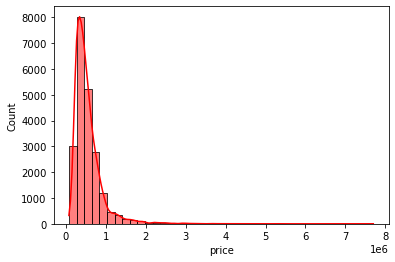

In [14]:
sns.histplot(hp['price'],kde=True,color='red',bins=40)

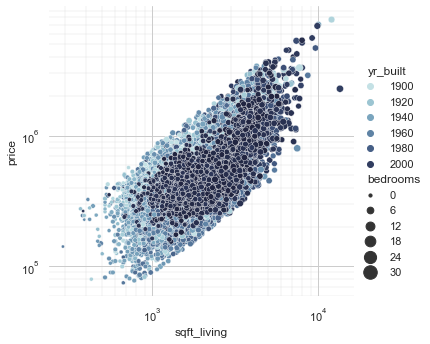

In [26]:
sns.set_theme(style="whitegrid")

# Load the example planets dataset


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=hp,
    x="sqft_living", y="price",
    hue="yr_built",size='bedrooms',
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

nous remarquons que les maisons sont avec la plus grande surface sont de meilleurs prix et plus on trouve les maisons avec peu de chambre a bas prix 

<AxesSubplot:xlabel='view', ylabel='count'>

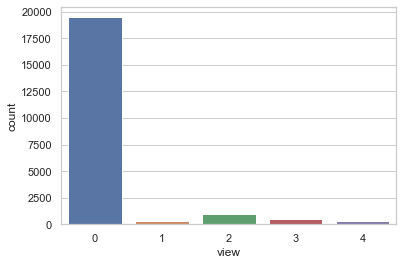

In [32]:

sns.countplot(x='view',data=hp)

la plus part des maison n'ont aucune vue 


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

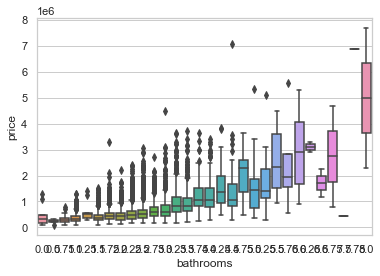

In [40]:
hp=hp.astype({'bathrooms':'int64'})

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

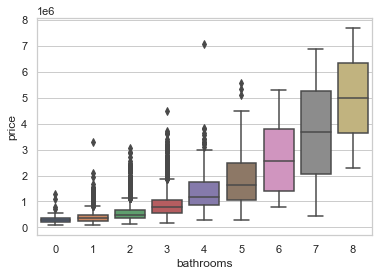

In [41]:
sns.boxplot(x='bathrooms',y='price',data=hp)

In [43]:
pd.DataFrame(hp.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.510072
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


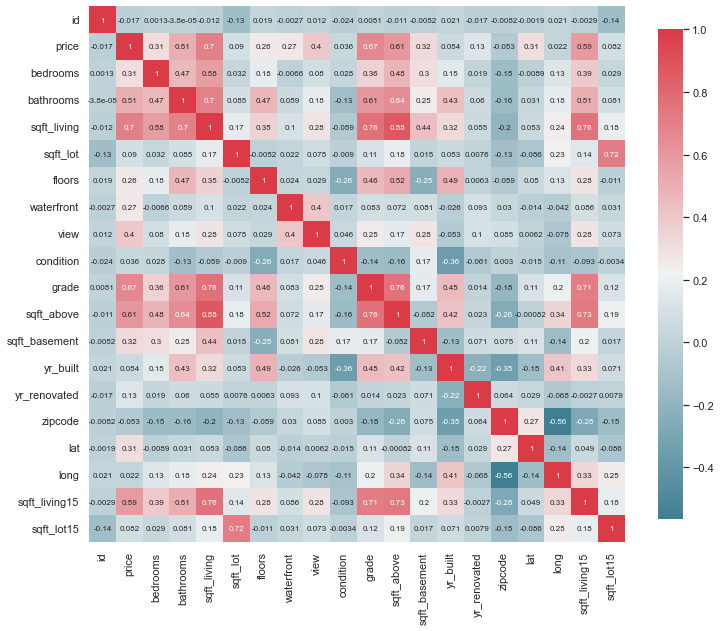

In [46]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 8}

        )
plot_correlation_map(hp)   

In [18]:
hp['surface']=hp['sqft_living']+hp['sqft_above']
hp =hp.drop(['sqft_living', 'sqft_above'],axis=1)

nous remarquons que le prix a une forte correlation avec la surface la vue le nombre de chambre


In [19]:
hp['date'] = pd.to_datetime(hp['date'])
hp['Month'] = hp['date'].apply(lambda date: date.month)
hp['Year'] = hp['date'].apply(lambda date: date.year)
hp=hp.drop(["zipcode","id","condition","long","date"], axis=1)

on a extrait l'annee et le mois de la colonee date 

In [24]:
x=hp["surface"].values
y=hp["price"].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10) 

model=LinearRegression()   
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 
y_pred_train = model.predict(x_train)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 78103145244.61931
R squared 0.46539250106285757


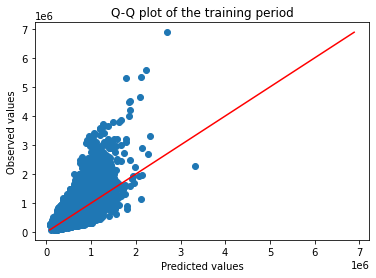

In [25]:
plt.scatter(x=y_pred_train, y=y_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red")
plt.title("Q-Q plot of the training period")
plt.xlabel("Predicted values")
plt.ylabel("Observed values")
plt.show()

In [12]:


x=hp.drop(["price"], axis=1)
y=hp["price"].values


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30) 

model=LinearRegression()   
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 36151323651.10364
R squared 0.7115886103647382


on voit que le score de notre modele augmente cela est du au fait que la regression dans ce cas est relié a plusieurs features pas un seul

In [43]:

from sklearn.preprocessing import PolynomialFeatures 
from sklearn import preprocessing
x= hp.drop(['price'], axis=1)
y= hp["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12) 
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)

x_test_ = poly.fit_transform(x_test)

predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  30653099908.92373
R squared:  0.8005042349029209


nous remarquons que le score en utilisant polynomial regression est plus elevé que celui de la regression linear , 0.8 est un bon score 

remarque: pour ma part je pense que utiliser lasso serait mieux car nous remarquons dans la matrice de correlation que plusieurs features sont correlé entre eux lasso nous aidera a minimiser les features